<a href="https://colab.research.google.com/github/masataka715/jupyter_notebook_playground/blob/master/cifar10_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.cifar10.load_data()

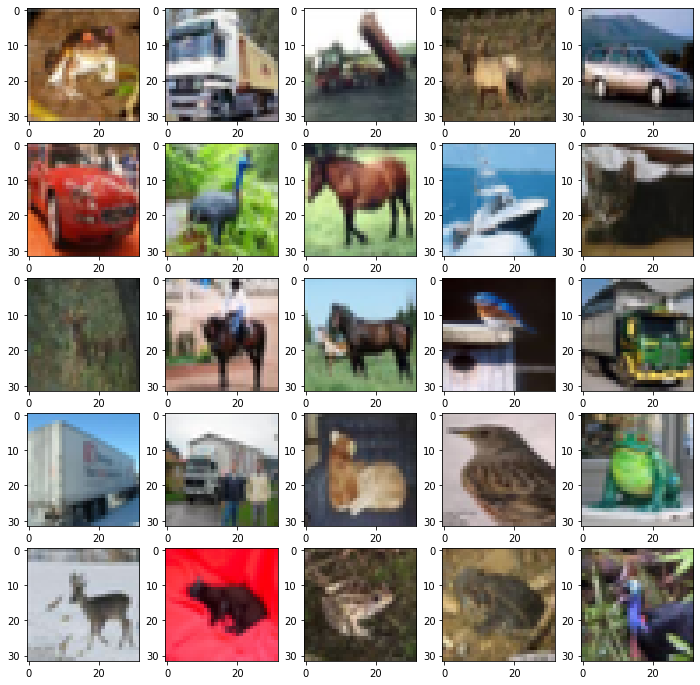

In [27]:
#  25 枚ランダムに抜粋して表示
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])

In [28]:
# 正規化
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [20]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras import models, layers
      
reset_seed(0)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 
  
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
batch_size = 1024
epochs = 20
history = model.fit(x_train, t_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, t_test))

Epoch 1/20
49/49 [==============================] - 4s 83ms/step - loss: 1.9393 - accuracy: 0.2979 - val_loss: 1.6622 - val_accuracy: 0.4089
Epoch 2/20
49/49 [==============================] - 3s 65ms/step - loss: 1.5515 - accuracy: 0.4445 - val_loss: 1.4450 - val_accuracy: 0.4832
Epoch 3/20
49/49 [==============================] - 3s 65ms/step - loss: 1.3920 - accuracy: 0.5047 - val_loss: 1.3469 - val_accuracy: 0.5242
Epoch 4/20
49/49 [==============================] - 3s 65ms/step - loss: 1.2978 - accuracy: 0.5427 - val_loss: 1.2348 - val_accuracy: 0.5622
Epoch 5/20
49/49 [==============================] - 3s 65ms/step - loss: 1.2061 - accuracy: 0.5778 - val_loss: 1.1623 - val_accuracy: 0.5885
Epoch 6/20
49/49 [==============================] - 3s 65ms/step - loss: 1.1337 - accuracy: 0.6046 - val_loss: 1.1365 - val_accuracy: 0.5997
Epoch 7/20
49/49 [==============================] - 3s 65ms/step - loss: 1.0695 - accuracy: 0.6277 - val_loss: 1.0825 - val_accuracy: 0.6186
Epoch 8/20
49

In [ ]:
results = pd.DataFrame(history.history)
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
19,0.716342,0.7546,0.842529,0.7098


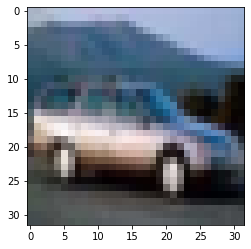

In [21]:
img = x_train[4]
plt.imshow(img)

In [ ]:
# データ拡張のためのモジュール
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 処理後を可視化する関数
def show(img, datagen):
    # (batch_size, height, width, channel) に reshape する
    img_batch = img.reshape(1, 32, 32, 3)

    # datagen.flow() でデータセットから Augmentation 処理をかけながらミニバッチを読み込む
    # 今回は、1 サンプルのデータセットを batch_size=1 で読み込む。
    for img_augmented in datagen.flow(img_batch, batch_size=1):
        # batch_size の次元を削除
        out = img_augmented.reshape(32, 32, 3)
        break

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title('before')
    plt.imshow(img)
  
    plt.subplot(1, 2, 2)
    plt.title('after')
    plt.imshow(out)

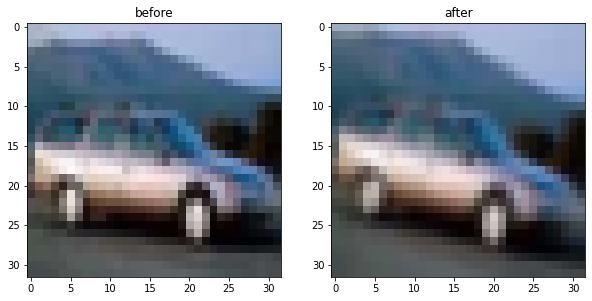

In [ ]:
# rotation_range(回転)
datagen = ImageDataGenerator(rotation_range=60)
show(img, datagen)

In [23]:
from tensorflow.keras.preprocessing import image

img = x_train[4]

# 水増し処理を定義
datagen = ImageDataGenerator(vertical_flip=True)

# (batch_size, height, width, channel) に reshape する
img_batch = img.reshape(1, 32, 32, 3)

# 今回は 1 枚だけ保存します
max_img_num = 1
counts = 1
for img_augmented in datagen.flow(img_batch, batch_size=1):
    # batch_size の次元を削除
    img_augmented = img_augmented.reshape(32, 32, 3)
    # 画像を保存
    image.save_img('augmented_output.png', img_augmented)
    # max_img_num の枚数を保存したら終了
    if (counts % max_img_num) == 0:
        print('Finish!!')
        break
    counts += 1

Finish!!


In [24]:
# 適用したいデータ拡張の種類を定義
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True)

In [25]:
reset_seed(0)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
]) 
  
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
 
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [29]:
batch_size = 1024
epochs = 20

history = model.fit_generator(datagen.flow(x_train, t_train, batch_size=batch_size),
                    steps_per_epoch = len(x_train) / batch_size, 
                    epochs = epochs,
                    validation_data = (x_test, t_test))

Epoch 1/20
49/48 [==============================] - 4s 82ms/step - loss: 2.3388 - accuracy: 0.0205 - val_loss: 2.8648 - val_accuracy: 0.0948
Epoch 2/20
49/48 [==============================] - 4s 79ms/step - loss: 2.3013 - accuracy: 0.3297 - val_loss: 2.7510 - val_accuracy: 0.0990
Epoch 3/20
49/48 [==============================] - 4s 79ms/step - loss: 2.3010 - accuracy: 0.1611 - val_loss: 2.8488 - val_accuracy: 0.1004
Epoch 4/20
49/48 [==============================] - 4s 79ms/step - loss: 2.3010 - accuracy: 0.0000e+00 - val_loss: 2.9718 - val_accuracy: 0.1011
Epoch 5/20
49/48 [==============================] - 4s 79ms/step - loss: 2.3013 - accuracy: 0.1024 - val_loss: 2.7798 - val_accuracy: 0.1144
Epoch 6/20
49/48 [==============================] - 4s 79ms/step - loss: 2.2998 - accuracy: 0.0161 - val_loss: 2.8456 - val_accuracy: 0.1154
Epoch 7/20
49/48 [==============================] - 4s 79ms/step - loss: 2.2995 - accuracy: 0.0837 - val_loss: 2.8055 - val_accuracy: 0.1339
Epoch 8/2

In [30]:
results = pd.DataFrame(history.history)
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
19,2.144849,0.14806,74.228859,0.9889
